In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
file1="c:/temp/B_data2_1.csv"
data2=pd.read_csv(file1)
y=data2['price']
x=data2['crime']
X=sm.add_constant(x)

result1=sm.OLS(y,X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.28
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.28e-19
Time:                        15:29:06   Log-Likelihood:                -1799.6
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0134      0.410     58.600      0.000      23.208      24.818
crime         -0.4159      0.044     -9.449      0.000      -0.502      -0.329
==============================================================================
Omnibus:                      139.591   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.258
Skew:                           1.489   Prob(JB):                     1.27e-64
Kurtosis:                       5.256   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Out of the sample

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [5]:
X_train.shape

(354, 2)

In [6]:
result2=sm.OLS(y_train,X_train).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     62.86
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.97e-14
Time:                        15:31:06   Log-Likelihood:                -1259.3
No. Observations:                 354   AIC:                             2523.
Df Residuals:                     352   BIC:                             2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1866      0.488     49.602      0.000      23.228      25.146
crime         -0.4308      0.054     -7.928      0.000      -0.538      -0.324
==============================================================================
Omnibus:                       95.612   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.628
Skew:                           1.445   Prob(JB):                     1.10e-41
Kurtosis:                       5.107   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
yhat2_test=result2.predict(X_test)
yhat2_test

329    24.157788
371    20.209847
219    24.137542
403    13.502872
78     24.162527
         ...    
4      24.156927
428    21.013220
385    16.944666
308    23.974283
5      24.173726
Length: 152, dtype: float64

In [8]:
resid_test=y_test-yhat2_test
MSE_test=(1/152)*sum(resid_test**2)
MSE_test

71.73033294147099

# Logistic Regression

In [9]:
file2="c:/temp/credit_LN4.csv"
credit=pd.read_csv(file2)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [10]:
# frequency table: default 할 사람 Yes, 안할 사람 No 숫자 세기
# pd.value_counts(데이터['변수'])

pd.value_counts(credit['default'])

No     9667
Yes     333
Name: default, dtype: int64

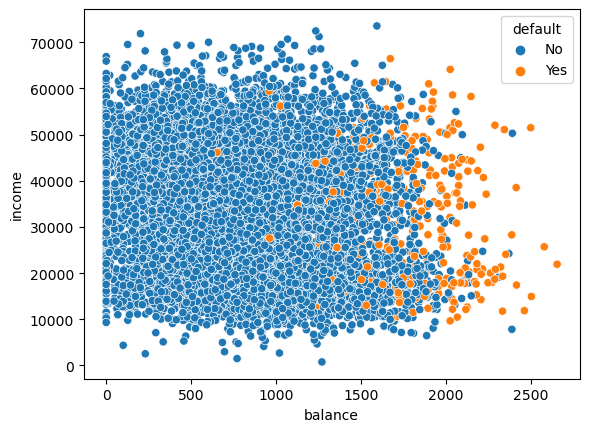

In [11]:
# Scatter Plot by Default
# sns.scatterplot(x='변수',y='변수',data=데이터이름)

sns.scatterplot(x='balance',y='income',data=credit,hue='default')
plt.show()

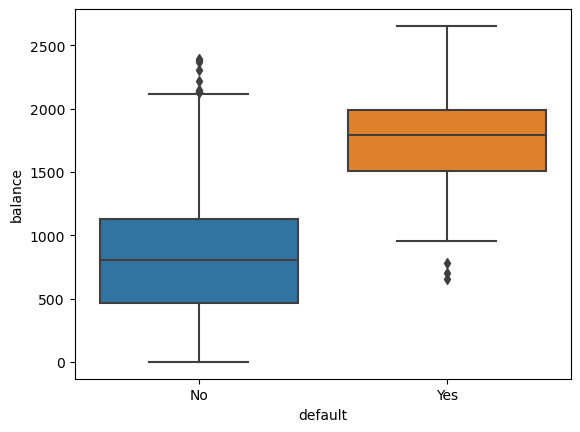

In [12]:
# Box Plot by Default
# sns.boxplot(x='변수',y='변수',data=데이터이름)

sns.boxplot(x='default',y='balance',data=credit)
plt.show()
# default한 사람은 주로 card balance 높다.

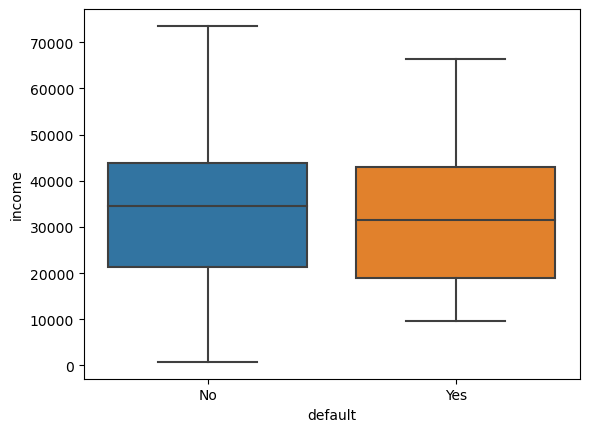

In [14]:
sns.boxplot(x='default',y='income',data=credit)
plt.show()

# 소득이랑 default할 지 안할 지랑은 크게 관련 없음.

## Logistic Regression 추정

Pr(y=1) 일 확률 구하는 것

일단 지금은 binary

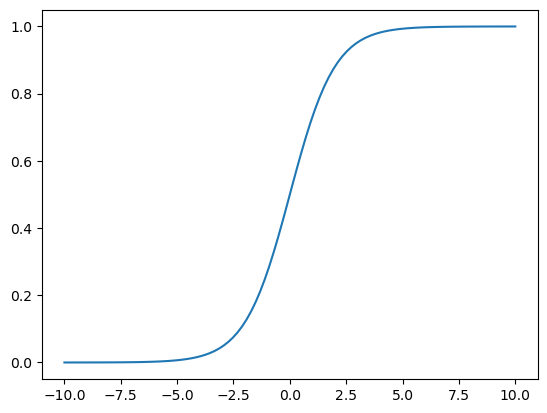

In [15]:
# CDF of logistic distribution

x=np.linspace(-10,10,100)
y=np.exp(x)/(1+np.exp(x))
plt.plot(x,y)
plt.show()

#### LPM; Linear Probability Model

In [17]:
# LPM

x=credit['balance']
X=sm.add_constant(x)
y=credit['default']

y=pd.get_dummies(y)
y=y['Yes']

LPM_result=sm.OLS(y,X).fit()
LPM_result.summary()

# 0.0001의 의미: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Yes   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.77e-286
Time:                        16:16:58   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Logistic Regression

LGT_result=sm.Logit(y,X).fit()
LGT_result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                     inf
Time:                        16:19:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Classification model 2 해보기!

In [ ]:
# Pr(y=1)일 확률
# 다음시간에
